In this Notebook, I will be analysing the hybrid funds with the help of data, maths and visualizations made with the help of python libraries like pandas and seaborn

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
df_schemes = pd.read_excel('/Users/AribM/Desktop/Mutual Funds India-Data Analysis/processed_data.xlsx')
# Filtering out Bad performing funds from the df and storing the rest in new df
df_filtered = df_schemes[
    ((df_schemes['Sharpe_annual'] > 0) &         # Keep funds with positive Sharpe
      (df_schemes['Sortino_Ratio'] > 0))         # Keep funds with decent risk-adjusted returns
]
df_hybrid = df_schemes[df_schemes['Scheme_Category'].str.contains("Hybrid",na=False)]

In [3]:
# We have the same funds with different options like regular, direct, growth, idcw etc., and so filtering the option with best CAGR for analysis
df_hybrid = df_hybrid.sort_values('CAGR', ascending=False).drop_duplicates(
    subset=['Fund_House', 'Scheme_Type', 'Scheme_Category'], keep='first'
)

In [4]:
# Determining the average returns for hybrid funds:
hybrid_avg_cagr = df_hybrid['CAGR'].mean()
print(hybrid_avg_cagr)

9.671714285714287


In [7]:
# Best Hybrid Funds for Investors who already have high risk equity schemes in portfolio
# For these investors the volatility should be low and return should be atleast the avg. of hybrid funds
df_hyb_1 = df_hybrid[(df_hybrid['std_dev'] <= 1) &
                      (df_hybrid['CAGR'] >= 9.7) &
                      (df_hybrid['Sortino_Ratio'] > 0) &
                      (df_hybrid['Sharpe_annual'] > 0)]
df_hyb_1 = df_hyb_1.sort_values(by='std_dev',ascending=True)
df_hyb_1.head() # Displaying a few funds

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Sortino_Ratio,Sharpe_annual
1382,Canara Robeco Mutual Fund,Open Ended Schemes,Hybrid Scheme - Conservative Hybrid Fund,118309,CANARA ROBECO CONSERVATIVE HYBRID FUND - DIREC...,0.290,5,9.991,1.307698,2.168096
2127,SBI Mutual Fund,Open Ended Schemes,Hybrid Scheme - Conservative Hybrid Fund,119839,SBI Conservative Hybrid Fund - Direct Plan - G...,0.313,5,10.237,1.261121,2.057725
2170,Kotak Mahindra Mutual Fund,Open Ended Schemes,Hybrid Scheme - Conservative Hybrid Fund,120154,Kotak Debt Hybrid - Growth - Direct,0.342,5,11.380,1.355297,2.083761
1797,HDFC Mutual Fund,Open Ended Schemes,Hybrid Scheme - Conservative Hybrid Fund,119118,HDFC Hybrid Debt Fund - Growth Option - Direct...,0.346,5,10.007,1.107173,1.828378
5533,SBI Mutual Fund,Open Ended Schemes,Hybrid Scheme - Dynamic Asset Allocation or Ba...,149135,SBI Balanced Advantage Fund - Direct Plan - In...,0.364,2,10.920,1.163358,1.849331


From these funds the investor can decide the most suitable funds on the basis of his/her investment goals and portfolio

In [8]:
# For conservative investors who have mostly safe and non volatile funds in portfolio should go for hybrid funds with relatively high risk and high return for balance, since anyway hyb funds are less volatile than equity ones
df_hyb_2 = df_hybrid[(df_hybrid['Sortino_Ratio'] > 0 )&
                     (df_hybrid['Sharpe_annual'] > 0) ]
df_hyb_2 = df_hyb_2.sort_values(by='CAGR',ascending=False).head()
df_hyb_2

,Fund_House,Scheme_Type,Scheme_Category,Scheme_Code,Scheme_Name,std_dev,active_years,CAGR,Sortino_Ratio,Sharpe_annual
2518,quant Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,120820,quant Multi Asset Fund - IDCW Option - Direct ...,0.934,5,23.322,1.274753,1.521898
4921,Tata Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,148052,Tata Multi Asset Opportnities Fund-Direct Plan...,0.744,3,22.527,1.501410,1.810189
2517,quant Mutual Fund,Open Ended Schemes,Hybrid Scheme - Aggressive Hybrid Fund,120819,quant Absolute Fund-Growth Option-Direct Plan,0.983,5,21.232,1.119773,1.338080
4583,Mahindra Manulife Mutual Fund,Open Ended Schemes,Hybrid Scheme - Aggressive Hybrid Fund,147446,Mahindra Manulife Aggressive Hybrid Fund - Dir...,0.849,4,20.181,1.179857,1.458241
5023,Nippon India Mutual Fund,Open Ended Schemes,Hybrid Scheme - Multi Asset Allocation,148458,NIPPON INDIA MULTI ASSET FUND - DIRECT Plan - ...,0.570,3,17.360,1.403886,1.841153


These are some funds that can considered for the conservative investors with safe portfolios for providing balance b/w overall risk and return.

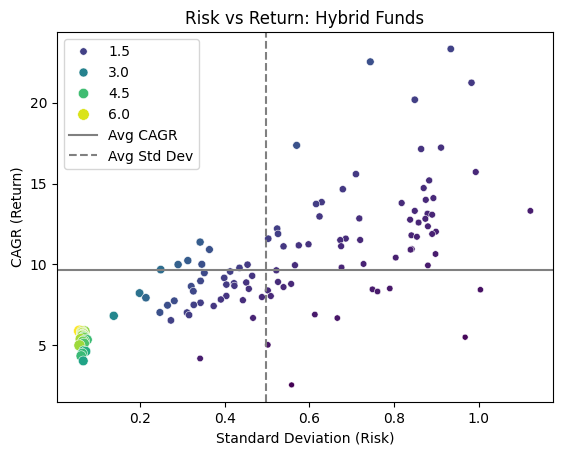

In [9]:
# Visualizing the Return Vs Volatility of Hybrid Schemes:
sns.scatterplot(data=df_hybrid,x='std_dev',y='CAGR',size='Sharpe_annual',hue='Sharpe_annual',palette='viridis')
plt.axhline(df_hybrid['CAGR'].mean(), linestyle='solid', color='gray', label="Avg CAGR")
plt.axvline(df_hybrid['std_dev'].mean(), linestyle='dashed', color='gray', label="Avg Std Dev")
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("CAGR (Return)")
plt.title("Risk vs Return: Hybrid Funds")
plt.legend()
plt.show()

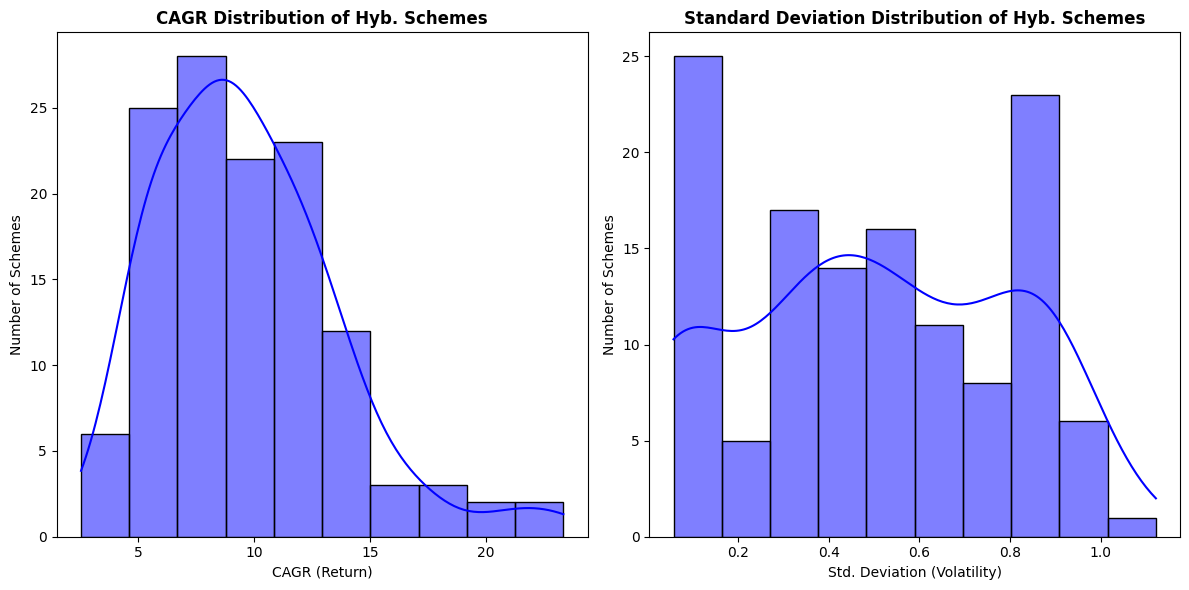

In [10]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
# Plotting both distributions on a single plot 
sns.histplot(data=df_hybrid['CAGR'],bins=10,kde=True,color='blue',ax=ax[0]) # Subplot 1
sns.histplot(data=df_hybrid['std_dev'],bins=10,kde=True,color='blue',ax=ax[1]) # Subplot 2
# Formatting SubPlot 1
ax[0].set_title("CAGR Distribution of Hyb. Schemes",fontsize=12,fontweight='bold')
ax[0].set_xlabel('CAGR (Return)',fontsize=10)
ax[0].set_ylabel('Number of Schemes',fontsize=10)
# Formatting Subplot 2
ax[1].set_title("Standard Deviation Distribution of Hyb. Schemes",fontsize=12,fontweight='bold')
ax[1].set_xlabel('Std. Deviation (Volatility)',fontsize=10)
ax[1].set_ylabel('Number of Schemes',fontsize=10)

fig.tight_layout()

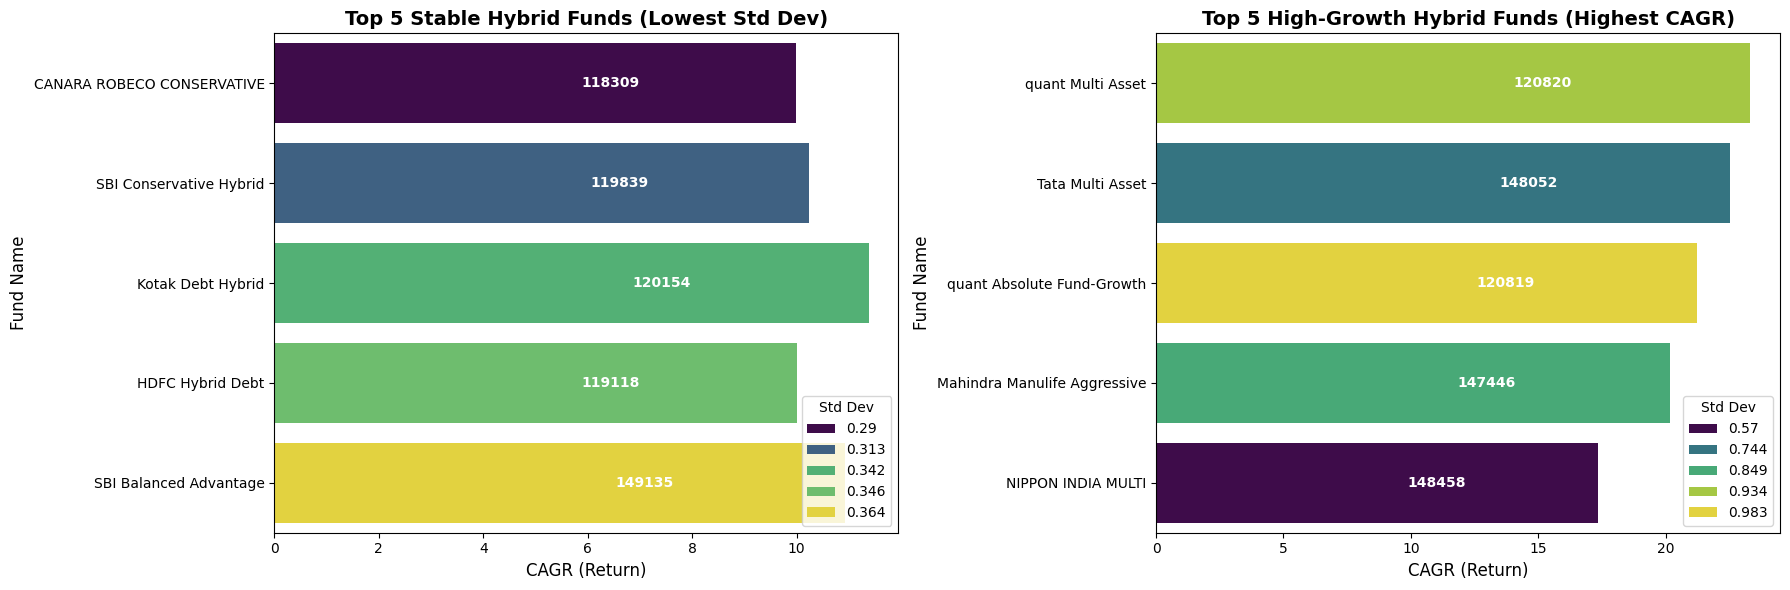

In [11]:
df_hyb_1["short_name"] = df_hyb_1["Scheme_Name"].apply(lambda x: " ".join(x.split()[:3])) #Short Names for fitting in Chart
fig,ax_2 = plt.subplots(1,2,figsize=(18,6))
plt.subplots_adjust(wspace=0.4)
sns.barplot(data=df_hyb_1.nsmallest(5,"std_dev"),x='CAGR',y='short_name',hue='std_dev',palette='viridis',ax=ax_2[0])
for row in df_hyb_1.nsmallest(5, "std_dev").itertuples():
    ax_2[0].text(
        row.CAGR * 0.7 ,  # Adjust position to be inside
        row.short_name, 
        str(row.Scheme_Code), 
        ha="right", 
        va="center", 
        fontsize=10, 
        color="white", 
        fontweight="bold",

    )
ax_2[0].set_title("Top 5 Stable Hybrid Funds (Lowest Std Dev)", fontsize=14, fontweight="bold")
ax_2[0].set_xlabel("CAGR (Return)", fontsize=12)
ax_2[0].set_ylabel("Fund Name", fontsize=12)
    
# Plot 2:
    
df_hyb_2["short_name"] = df_hyb_2["Scheme_Name"].apply(lambda x: " ".join(x.split()[:3]))
sns.barplot(data=df_hyb_2.nlargest(5,"CAGR"),x='CAGR',y='short_name',hue='std_dev',palette='viridis',ax=ax_2[1])
for index, row in enumerate(df_hyb_2.nlargest(5, "CAGR").itertuples()):
    ax_2[1].text(
        row.CAGR * 0.7,  # Adjust position to be inside
        index, 
        str(row.Scheme_Code), 
        ha="right", 
        va="center", 
        fontsize=10, 
        color="white", 
        fontweight="bold",
    )

ax_2[1].set_title("Top 5 High-Growth Hybrid Funds (Highest CAGR)", fontsize=14, fontweight="bold")
ax_2[1].set_xlabel("CAGR (Return)", fontsize=12)
ax_2[1].set_ylabel("Fund Name", fontsize=12)
ax_2[0].legend(title="Std Dev", loc="lower right", fontsize=10)
ax_2[1].legend(title="Std Dev", loc="lower right", fontsize=10)
fig.tight_layout()
plt.show()